# **Úloha 3 – Úvod do lineární algebry**

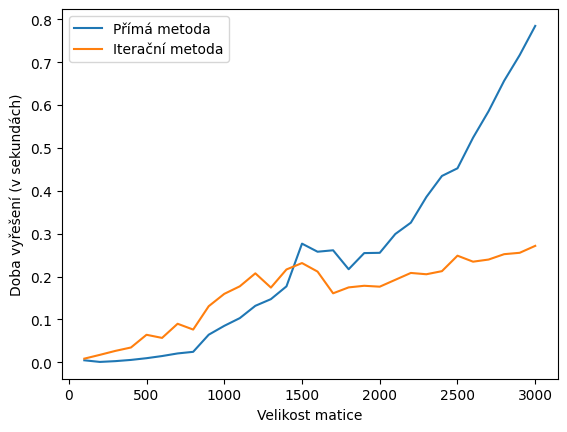

In [4]:
### Porovnání efektivity přímé a iterační metody při řešení soustavy rovnic

import numpy as np
import time
import matplotlib.pyplot as plt

max_size = 3000
step_size = 100
iterations = 10

matrix_sizes = np.arange(step_size, max_size + step_size, step_size)
direct_times = np.zeros_like(matrix_sizes, dtype=float)
iterative_times = np.zeros_like(matrix_sizes, dtype=float)


def direct(A, b):
    x = np.linalg.solve(A, b)
    return x

def jacobi(A, b, iters):
    x = np.zeros_like(b)
    for it_count in range(iters):
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
            if x_new[i] == x_new[i-1]:
                break
        if np.allclose(x, x_new, atol=1e-10, rtol=0.):
            break
        x = x_new
    return x


for i, size in enumerate(matrix_sizes):
    A = np.random.rand(size, size)
    b = np.random.rand(size)

    # Přímá metoda
    direct_start = time.time()
    x1 = direct(A, b)
    direct_end = time.time()
    direct_times[i] = direct_end - direct_start

    # Jacobiho iterační metoda
    iterative_start = time.time()
    x2 = jacobi(A, b, iterations)
    iterative_end = time.time()
    iterative_times[i] = iterative_end - iterative_start


plt.plot(matrix_sizes, direct_times, label="Přímá metoda")
plt.plot(matrix_sizes, iterative_times, label="Iterační metoda")
plt.xlabel("Velikost matice")
plt.ylabel("Doba vyřešení (v sekundách)")
plt.legend()
plt.show()